In [1]:
# Artificial Neural Network(Multi-Layer Perceptron)

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

In [2]:
# Part 1 - Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('musk_csv.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [6]:
dataset['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [7]:
print(dataset.isnull().sum())

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
f3                   0
f4                   0
f5                   0
f6                   0
f7                   0
f8                   0
f9                   0
f10                  0
f11                  0
f12                  0
f13                  0
f14                  0
f15                  0
f16                  0
f17                  0
f18                  0
f19                  0
f20                  0
f21                  0
f22                  0
f23                  0
f24                  0
f25                  0
f26                  0
f27                  0
                    ..
f138                 0
f139                 0
f140                 0
f141                 0
f142                 0
f143                 0
f144                 0
f145                 0
f146                 0
f147                 0
f148                 0
f149                 0
f150       

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 83, init = 'uniform', activation = 'relu', input_dim = 166))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 83, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=166, units=83, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=83, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, validation_split =0.2, epochs=100)


Train on 4222 samples, validate on 1056 samples
Epoch 1/100
4222/4222 [==============================] - 4s 950us/step - loss: 0.3180 - acc: 0.8624 - val_loss: 0.1998 - val_acc: 0.9214
Epoch 2/100
4222/4222 [==============================] - 1s 182us/step - loss: 0.1351 - acc: 0.9498 - val_loss: 0.1168 - val_acc: 0.9650
Epoch 3/100
4222/4222 [==============================] - 1s 161us/step - loss: 0.0858 - acc: 0.9709 - val_loss: 0.0812 - val_acc: 0.9754
Epoch 4/100
4222/4222 [==============================] - 1s 158us/step - loss: 0.0646 - acc: 0.9739 - val_loss: 0.0659 - val_acc: 0.9820
Epoch 5/100
4222/4222 [==============================] - 1s 169us/step - loss: 0.0414 - acc: 0.9853 - val_loss: 0.0504 - val_acc: 0.9839
Epoch 6/100
4222/4222 [==============================] - 1s 179us/step - loss: 0.0380 - acc: 0.9877 - val_loss: 0.0493 - val_acc: 0.9782
Epoch 7/100
4222/4222 [==============================] - 1s 188us/step - loss: 0.0256 - acc: 0.9903 - val_loss: 0.0476 - val_acc:

Epoch 58/100
4222/4222 [==============================] - 1s 162us/step - loss: 5.1578e-06 - acc: 1.0000 - val_loss: 0.0366 - val_acc: 0.9953
Epoch 59/100
4222/4222 [==============================] - 1s 163us/step - loss: 4.7083e-06 - acc: 1.0000 - val_loss: 0.0370 - val_acc: 0.9953
Epoch 60/100
4222/4222 [==============================] - 1s 244us/step - loss: 4.2819e-06 - acc: 1.0000 - val_loss: 0.0369 - val_acc: 0.9953
Epoch 61/100
4222/4222 [==============================] - 1s 222us/step - loss: 3.9674e-06 - acc: 1.0000 - val_loss: 0.0369 - val_acc: 0.9953
Epoch 62/100
4222/4222 [==============================] - 1s 205us/step - loss: 3.6330e-06 - acc: 1.0000 - val_loss: 0.0373 - val_acc: 0.9953
Epoch 63/100
4222/4222 [==============================] - 1s 263us/step - loss: 3.3547e-06 - acc: 1.0000 - val_loss: 0.0374 - val_acc: 0.9953
Epoch 64/100
4222/4222 [==============================] - 1s 352us/step - loss: 3.0936e-06 - acc: 1.0000 - val_loss: 0.0379 - val_acc: 0.9953
Epoch 

In [12]:
print(history)

In [13]:
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [14]:
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [15]:
# evaluate the model
_, train_acc = classifier.evaluate(X_train, y_train, verbose=0)
_, test_acc = classifier.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.993


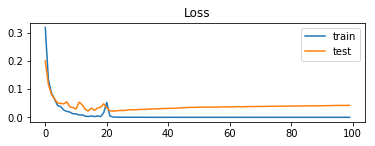

In [16]:
# Plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

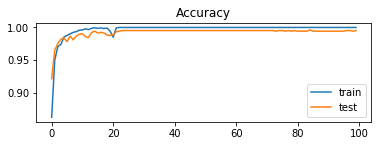

In [17]:
# Plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
confusion_matrix(y_test, y_pred)

array([[1117,    3],
       [   6,  194]], dtype=int64)

In [19]:
# accuracy: (tp + tn) / (p + n)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % acc)

Accuracy: 0.993182


In [20]:
# precision tp / (tp + fp)
pre = precision_score(y_test, y_pred)
print('Precision: %f' % pre)

Precision: 0.984772


In [21]:
# recall: tp / (tp + fn)
rec = recall_score(y_test, y_pred)
print('Recall: %f' % rec)

Recall: 0.970000


In [22]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.977330
